In [1]:
import pickle,glob,re
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
listeSepares=glob.glob("/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/*-Separe.csv")
listeMorphomes=glob.glob("/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/*-Groupe*.csv")

In [4]:
def tiragesNom(nom,listeTirages):
    result=[tirage for tirage in listeTirages if nom in tirage]
    return sorted(result)

In [5]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("poster")
sns.set_palette("husl")

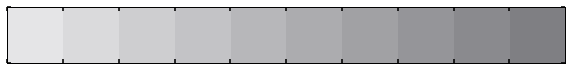

In [6]:
grayScalePalette=sns.cubehelix_palette(10, hue=0.05, rot=0, light=0.9, dark=0.5)
sns.palplot(grayScalePalette)

In [7]:
def lireEchantillon(nom):
    df=pd.read_csv(nom,skiprows=1,sep=";",index_col="colonne")
    df.drop("ligne",inplace=True)
    return df

In [30]:
def heatmap(df):
    fig, ax = plt.subplots(figsize=(50,40))
#    ax.set_ylabel('Cells sorted by decreasing frequency')    
#    ax.set_xlabel('Cells sorted by decreasing frequency')
    sns.heatmap(df,cmap="Oranges",norm=norm,annot=True,annot_kws={"size": 16},fmt="g",cbar_kws={"ticks":bounds},ax=ax,cbar=True)
    return

In [9]:
bounds = np.array([0, 3, 10, 30, 100, 300, 1000, 5000])
norm = mplt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)

In [10]:
freqSortedCases=[u'pi3S', u'inf', u'ppMS', u'pi1S', u'ii3S', u'pi2S', u'pi2P', u'ai3S', u'pi3P', u'ppFS', 
                 u'ii1S', u'pP', u'ii3P', u'ppMP', u'fi3S', u'pc3S', u'pi1P', u'ps3S', u'fi1S', u'pc1S', 
                 u'ppFP', u'pI2P', u'ai1S', u'pI2S', u'ai3P', u'fi2S', u'ii1P', u'fi2P', u'ii2P', u'fi3P', 
                 u'is3S', u'fi1P', u'pc3P', u'pc2P', u'ps2S', u'pI1P', u'ps3P', u'pc2S', u'pc1P', u'ai1P', 
                 u'ii2S', u'ps2P', u'is3P', u'ai2S', u'ps1P', u'is1S', u'ai2P', u'ps1S', u'is1P', u'is2S', 
                 u'is2P']

In [11]:
def sortCellFrequency(df):
    return pd.Series(np.diag(df),index=df.index).sort_values(ascending=False).index.tolist()

In [12]:
df=lireEchantillon(separe)
df,pd.Series(sortCellFrequency(df),index=df.index).sort_values(ascending=False).index.tolist()

NameError: name 'separe' is not defined

In [13]:
def getTokens(name):
    m=re.search(ur"\d+-T(\d+)-F\d+",name)
    if m:
        return int(m.group(1))
    else:
        print "no Tokens"
        return None

In [25]:
#tokensEchantillons=[2000000,8000000,30000000,130000000]
tokensEchantillons=[30000000]
separePoints=[]
for separe in listeSepares:
    tokens=getTokens(separe)
    if tokens in tokensEchantillons:
        separePoints.append(separe)

In [26]:
separePoints

['/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-119-T30000000-F70110-180116-15473-Separe.csv']

30000000 Longitudinal-119-T30000000-F70110-180116-15473-Separe.csv


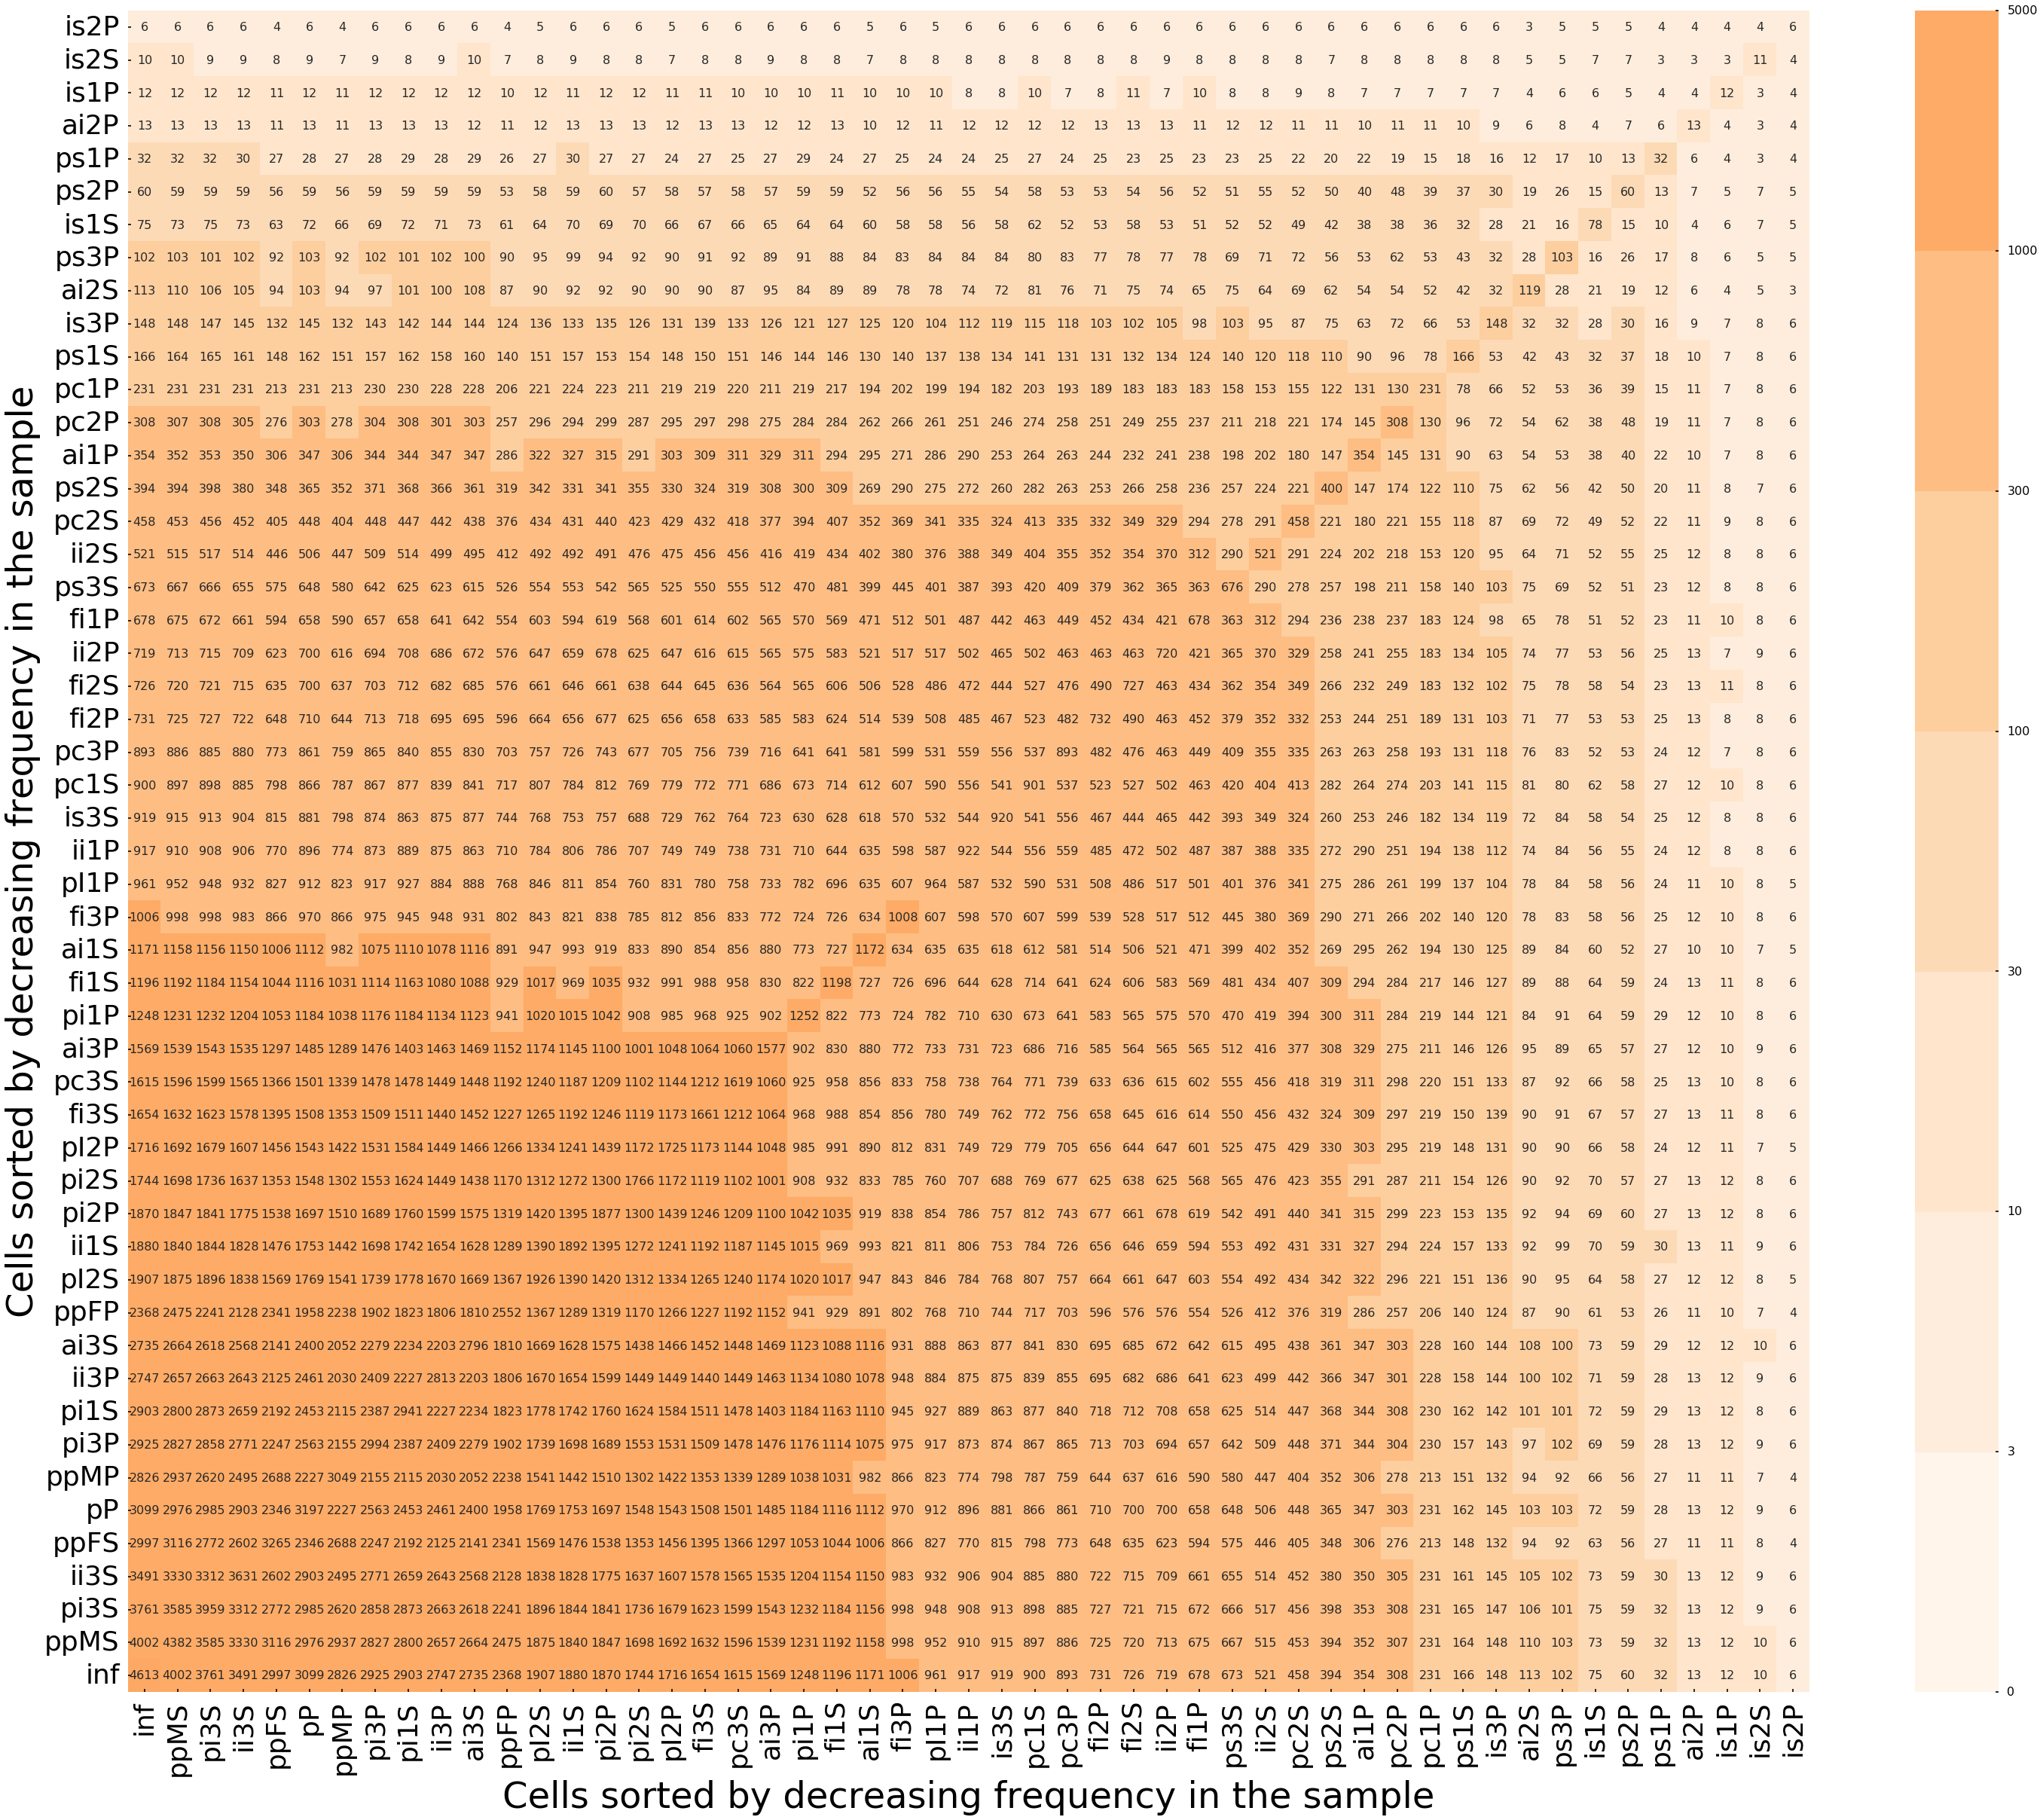

In [31]:
for separe in separePoints[:]:
    tokens=getTokens(separe)
    print tokens,separe.split("/")[-1]
    df=lireEchantillon(separe)
    sortedSampleCases=sortCellFrequency(df)
    df=df[sortedSampleCases]
    df=df.reindex(sortedSampleCases[::-1])
    heatmap(df)
    plt.xlabel('Cells sorted by decreasing frequency in the sample',fontsize=48) 
    plt.ylabel('Cells sorted by decreasing frequency in the sample',fontsize=48) 
    plt.xticks(fontsize=36, rotation=90) 
    plt.yticks(fontsize=36, rotation=0) 
#    plt.show()
    plt.savefig("DistCoformsCellPairs-%d.png"%tokens,dpi=150, bbox_inches="tight")

In [22]:
df.reindex(sortedSampleCases)

,pi3S,inf,ppMS,pi1S,ii3S,pi2S,pi2P,ai3S,pi3P,ppFS,...,ai1P,ii2S,ps2P,is3P,ai2S,ps1P,is1S,ai2P,ps1S,is2P
colonne,,,,,,,,,,,,,,,,,,,,,
pi3S,1696.0,1349.0,1189.0,854.0,1019.0,488.0,541.0,737.0,753.0,717.0,...,54.0,30.0,10.0,10.0,6.0,4.0,4.0,1.0,4.0,2.0
inf,1349.0,2227.0,1413.0,913.0,1132.0,508.0,569.0,786.0,814.0,851.0,...,54.0,30.0,10.0,10.0,6.0,4.0,5.0,1.0,4.0,2.0
ppMS,1189.0,1413.0,1885.0,819.0,1013.0,483.0,533.0,728.0,739.0,844.0,...,52.0,30.0,10.0,10.0,5.0,4.0,3.0,1.0,4.0,2.0
pi1S,854.0,913.0,819.0,1015.0,753.0,433.0,467.0,577.0,567.0,549.0,...,52.0,28.0,10.0,9.0,6.0,4.0,4.0,1.0,4.0,2.0
ii3S,1019.0,1132.0,1013.0,753.0,1389.0,436.0,477.0,674.0,690.0,648.0,...,52.0,29.0,10.0,10.0,6.0,4.0,4.0,1.0,3.0,2.0
pi2S,488.0,508.0,483.0,433.0,436.0,539.0,343.0,350.0,373.0,319.0,...,40.0,29.0,10.0,7.0,5.0,4.0,4.0,1.0,4.0,2.0
pi2P,541.0,569.0,533.0,467.0,477.0,343.0,598.0,387.0,401.0,356.0,...,43.0,28.0,10.0,8.0,5.0,4.0,4.0,1.0,3.0,2.0
ai3S,737.0,786.0,728.0,577.0,674.0,350.0,387.0,918.0,506.0,481.0,...,52.0,27.0,9.0,8.0,5.0,4.0,5.0,1.0,4.0,2.0
pi3P,753.0,814.0,739.0,567.0,690.0,373.0,401.0,506.0,955.0,486.0,...,50.0,27.0,10.0,9.0,5.0,4.0,4.0,1.0,3.0,2.0
